In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"updated_data_with_img.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28415 entries, 0 to 28414
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        28411 non-null  object 
 1   Tag          28407 non-null  object 
 2   Review       28407 non-null  float64
 3   Address      28407 non-null  object 
 4   Mention      28407 non-null  object 
 5   Comment      28407 non-null  object 
 6   Country      28406 non-null  object 
 7   Price        28407 non-null  float64
 8   Rating       28407 non-null  float64
 9   tags         28407 non-null  object 
 10  Governorate  28407 non-null  object 
 11  img_link     27835 non-null  object 
dtypes: float64(3), object(9)
memory usage: 2.6+ MB


In [5]:
print(df.columns)


Index(['Title', 'Tag', 'Review', 'Address', 'Mention', 'Comment', 'Country',
       'Price', 'Rating', 'tags', 'Governorate', 'img_link'],
      dtype='object')



Recommendations for Egypt, Cairo:

Title: Royal Maxim Palace Kempinski Cairo
Price: 31.94
Rating: 1.01
Review Count: 2.0
Tags: Hotel
Address: First Settlement, Cairo, Cairo Governorate, Egypt
Image Link: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR4-ofjYAm8QlkjBlL7EnZ03uvLdDeFSlBrfw&s
--------------------
Title: Blue Bird Hotel Cairo
Price: 37.21
Rating: 1.16
Review Count: 41.0
Tags: Hotel
Address: 42 Talaat Harb Street, Cairo, Cairo Governorate, Egypt
Image Link: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS3BlIms2iQk_hWYsHCIulemaDIa4UfCyOnwQ&s
--------------------
Title: Abou El Sid
Price: 34.91
Rating: 1.1
Review Count: 24.0
Tags: Restaurant
Address: Omar Ibn El Khattab St, Cairo, Cairo Governorate, Egypt
Image Link: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQAtspw0CkvKFbvbrgc5i665m5GnkV3kBFIhg&s
--------------------
Title: Mori Sushi
Price: 35.86
Rating: 1.12
Review Count: 31.0
Tags: Restaurant
Address: 19 El Gabalaya St., Cairo, Cairo Governorate,
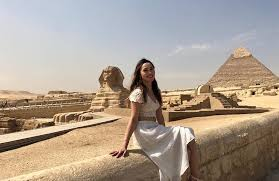
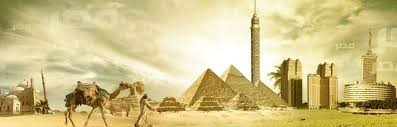
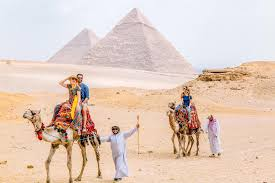
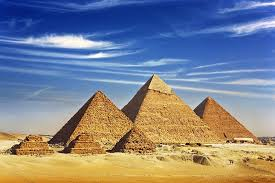

In [6]:
import pandas as pd
import random

def get_recommendations_by_location(country, governorate, df, num_recommendations=20):
    try:
        # Convert column names to lower case and replace spaces with underscores
        df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
        
        # Filter data based on country and governorate
        filtered_df = df[(df['country'].str.lower() == country.lower()) & (df['governorate'].str.lower() == governorate.lower())]
        
        # If fewer rows are found than requested recommendations, return all available rows
        if len(filtered_df) == 0:
            print(f"No recommendations found for {country}, {governorate}.")
            return pd.DataFrame()
        elif len(filtered_df) < num_recommendations:
            num_recommendations = len(filtered_df)  # Show all available recommendations
        
        # Randomly select the requested number of recommendations
        selected_indices = random.sample(range(len(filtered_df)), num_recommendations)
        
        # Select columns based on availability in the data
        columns_to_select = ['title', 'price', 'rating', 'review', 'tags']
        if 'address' in filtered_df.columns:
            columns_to_select.append('address')
        if 'img_link' in filtered_df.columns:
            columns_to_select.append('img_link')
        
        recommendations = filtered_df.iloc[selected_indices][columns_to_select].copy()
        
        # Display the results in a formatted manner
        print(f"\nRecommendations for {country}, {governorate}:\n")
        
        # Print each recommendation row by row
        for index, row in recommendations.iterrows():
            print(f"Title: {row['title']}")
            print(f"Price: {row['price']}")
            print(f"Rating: {row['rating']}")
            print(f"Review Count: {row['review']}")
            print(f"Tags: {row['tags']}")
            if 'address' in columns_to_select:
                print(f"Address: {row['address']}")
            if 'img_link' in columns_to_select:
                print(f"Image Link: {row['img_link']}")
            print("--------------------")
        
        return recommendations
    
    except KeyError as e:
        print(f"Error: {e} column(s) not found in the data.")
        return pd.DataFrame()
    except Exception as e:
        print(f"Error: {e}")
        return pd.DataFrame()

# Example usage:
user_country = "Egypt"
user_governorate = "Cairo"
recommendations_by_location = get_recommendations_by_location(user_country, user_governorate, df)


In [19]:
for col in df.columns:
    print(col)

title
tag
review
address
mention
comment
country
price
rating
tags
governorate
img_link


In [24]:
unique_governorates = df['governorate'].dropna().unique()

# Function to remove governorate names from titles
def remove_governorates(title, governorates):
    if pd.isna(title) or title == '':
        return title  # Return NaN or empty string as is
    else:
        pattern = r'\b(' + '|'.join(map(re.escape, governorates)) + r')\b'
        clean_title = re.sub(pattern, '', str(title))
        # Remove extra spaces
        clean_title = re.sub(r'\s+', ' ', clean_title).strip()
        return clean_title

# Apply the function to the 'title' column
df['title'] = df['title'].apply(lambda x: remove_governorates(x, unique_governorates))
df

,title,tag,review,address,mention,comment,country,price,rating,tags,governorate,img_link
0,Adventure Alegria ASEG Travel,Tours,14.0,"29, Cite des PTT, Hydra, Algiers, Algiers, Alg...",10 mentions of Algeria,Visiting Algeria is a truly remarkable experie...,Algeria,33.56,1.06,Tours,Mostaganem,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,Fancyellow Travel Services,Tours,151.0,"Algiers, Algiers Province, Algeria",72 mentions of Algeria,that went above and beyond to provide us with ...,Algeria,52.07,1.60,Tours,Ghardaia,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,Memorial du Martyr,Monuments & Statues,529.0,"Boulevard Khalifa Oulmane, Algiers, Algiers Pr...",31 mentions of Algeria,and very close to the shopping mall where you ...,Algeria,103.15,3.12,Archaeological tourism,Tebessa,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,Cederberg Wilderness Area,for fun,86.0,"Clanwilliam, Western Cape, South Africa",12 mentions of Algeria,So instead we did a couple half day hikes arou...,Algeria,43.29,1.34,for fun,Illizi,NaN
4,Timgad,Ancient Ruins,100.0,"Timgad, Batna Province, Algeria",12 mentions of Algeria,Timgad was my main reason to travel to Algeria...,Algeria,45.18,1.40,Archaeological tourism,El Oued,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
...,...,...,...,...,...,...,...,...,...,...,...,...
28410,Palm Beach Palace,Hotels,222.0,"Route Touristique, Tozeur, Tozeur Governorate,...",4 mentions of Tunisia,"Like many hotels in Tunisia, this one is suffe...",Tunisia,61.67,1.89,Hotel,Medenine,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
28411,Hotel Lac Leman,Hotels,43.0,"Rue Lac Leman, Tunis, Tunis Governorate, Tunisia",2 mentions of Tunisia,This is not the kind of hotels you should book...,Tunisia,37.48,1.17,Hotel,Monastir,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
28412,Hotel Riad Meninx Djerba,Hotels,69.0,"Zone Touristique, Midoun, Djerba Island, Meden...",Unknown,No Comment,Tunisia,40.99,1.28,Hotel,Ariana,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
28413,Floriana Meninx Settemari Club,Hotels,7.0,"Djerba Island, Medenine Governorate, Tunisia",Unknown,No Comment,Tunisia,32.61,1.03,Hotel,Zaghouan,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
